### We read in the data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np

bikehc_df = 'bikeshare_hour_count.csv'
day_hour_count = pd.read_csv(bikehc_df)
day_hour_count


,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


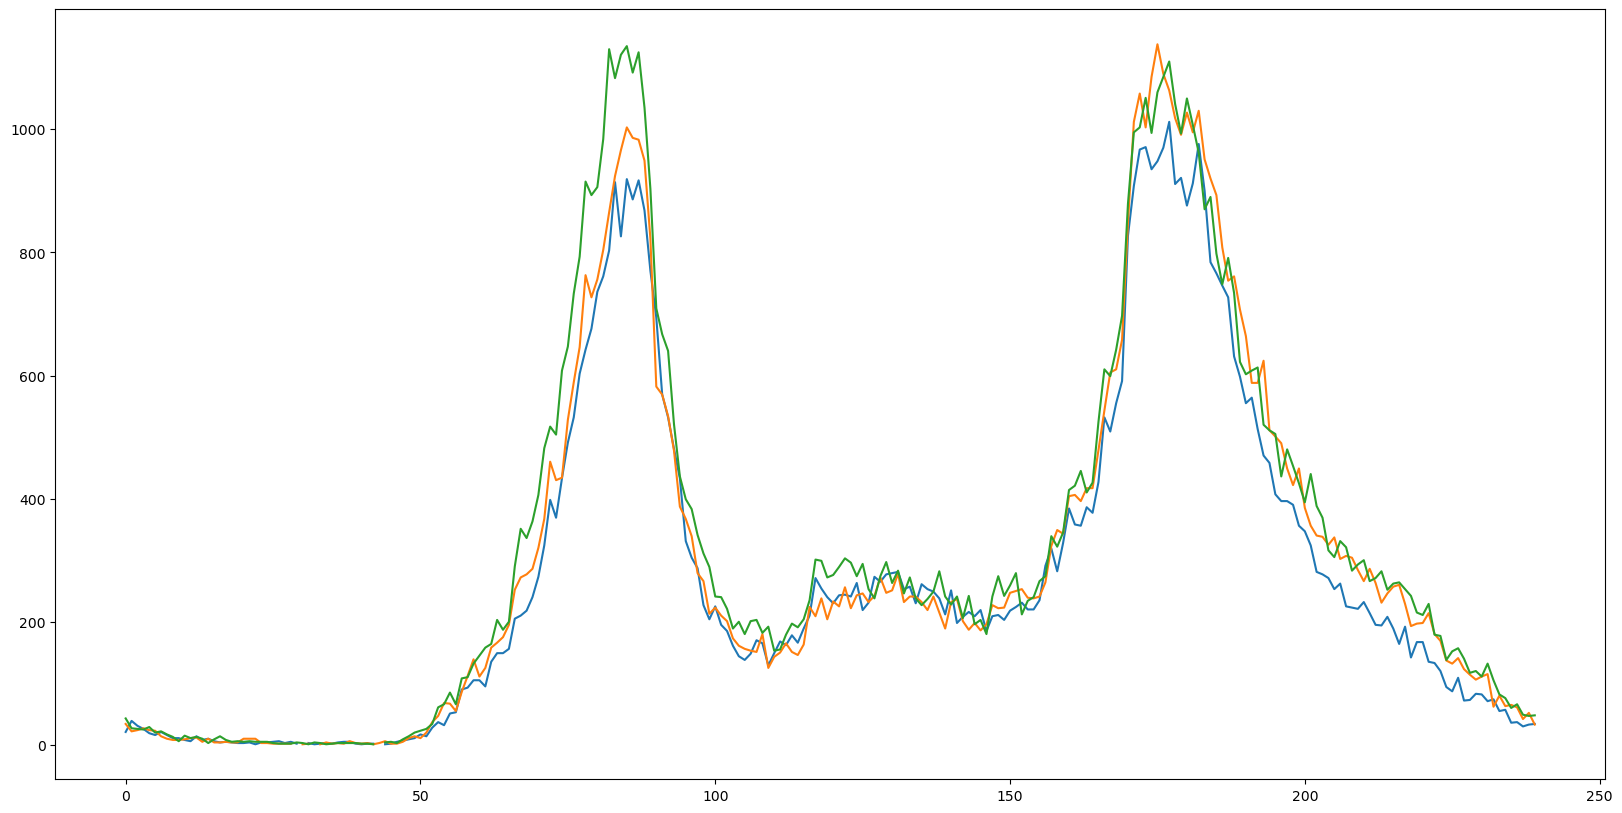

In [2]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])


# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [3]:
monday = day_hour_count[['hour', 'monday']].copy()
tuesday = day_hour_count[['hour', 'tuesday']].copy()
saturday = day_hour_count[['hour', 'saturday']].copy()
sunday = day_hour_count[['hour', 'sunday']].copy()


In [4]:
monday
tuesday
saturday
sunday


,hour,sunday
0,0.0,106.0
1,0.1,100.0
2,0.2,77.0
3,0.3,87.0
4,0.4,69.0
...,...,...
235,23.5,28.0
236,23.6,28.0
237,23.7,27.0
238,23.8,24.0



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

41987.44560589795


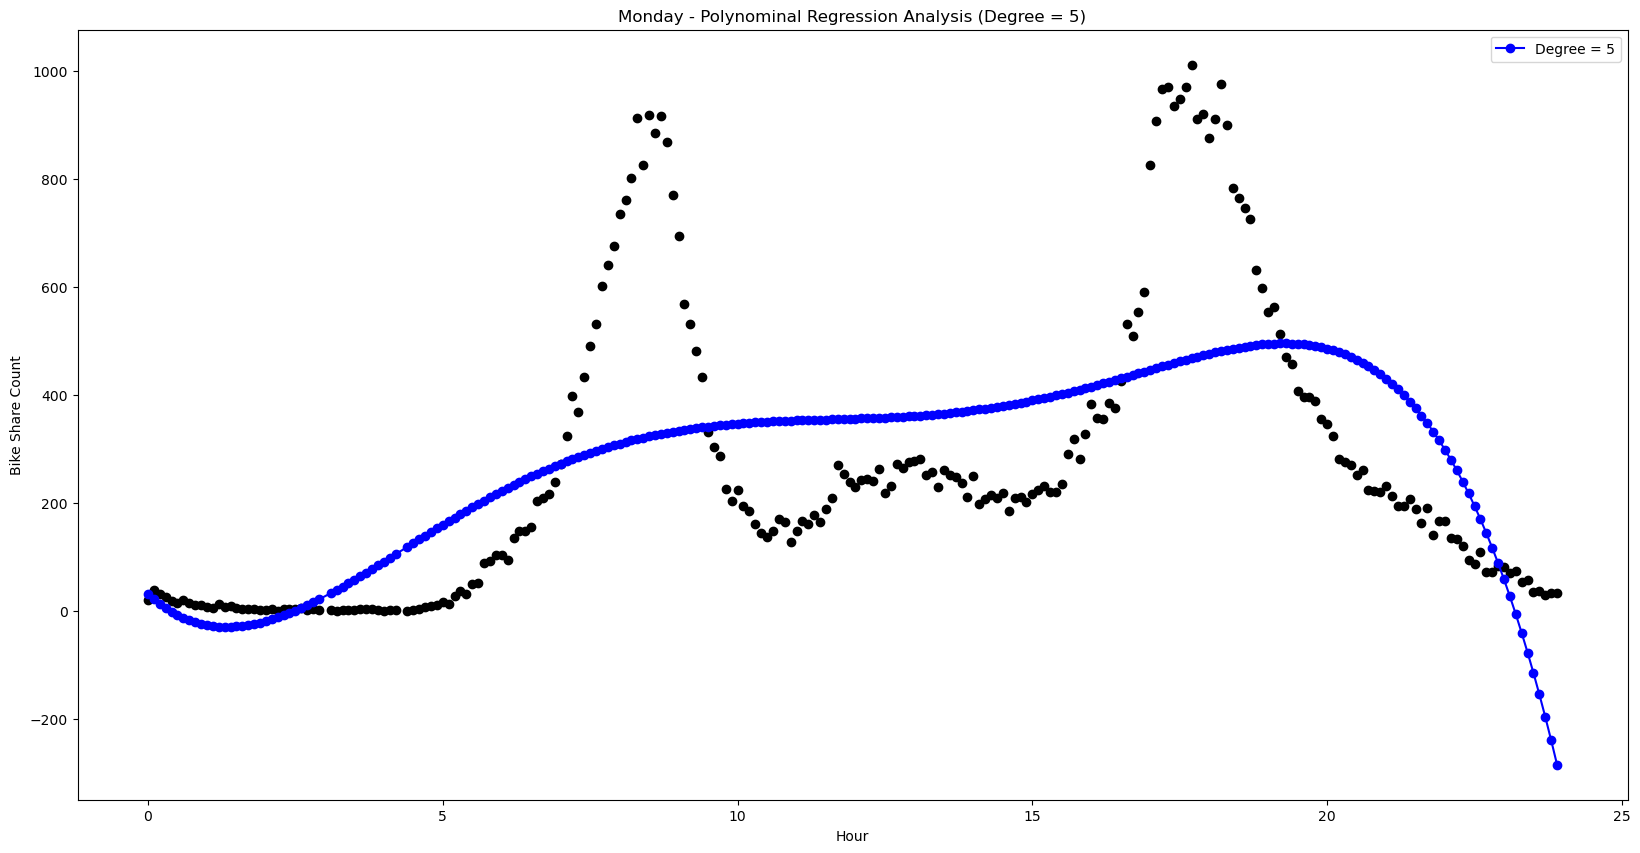

19403.94134349191


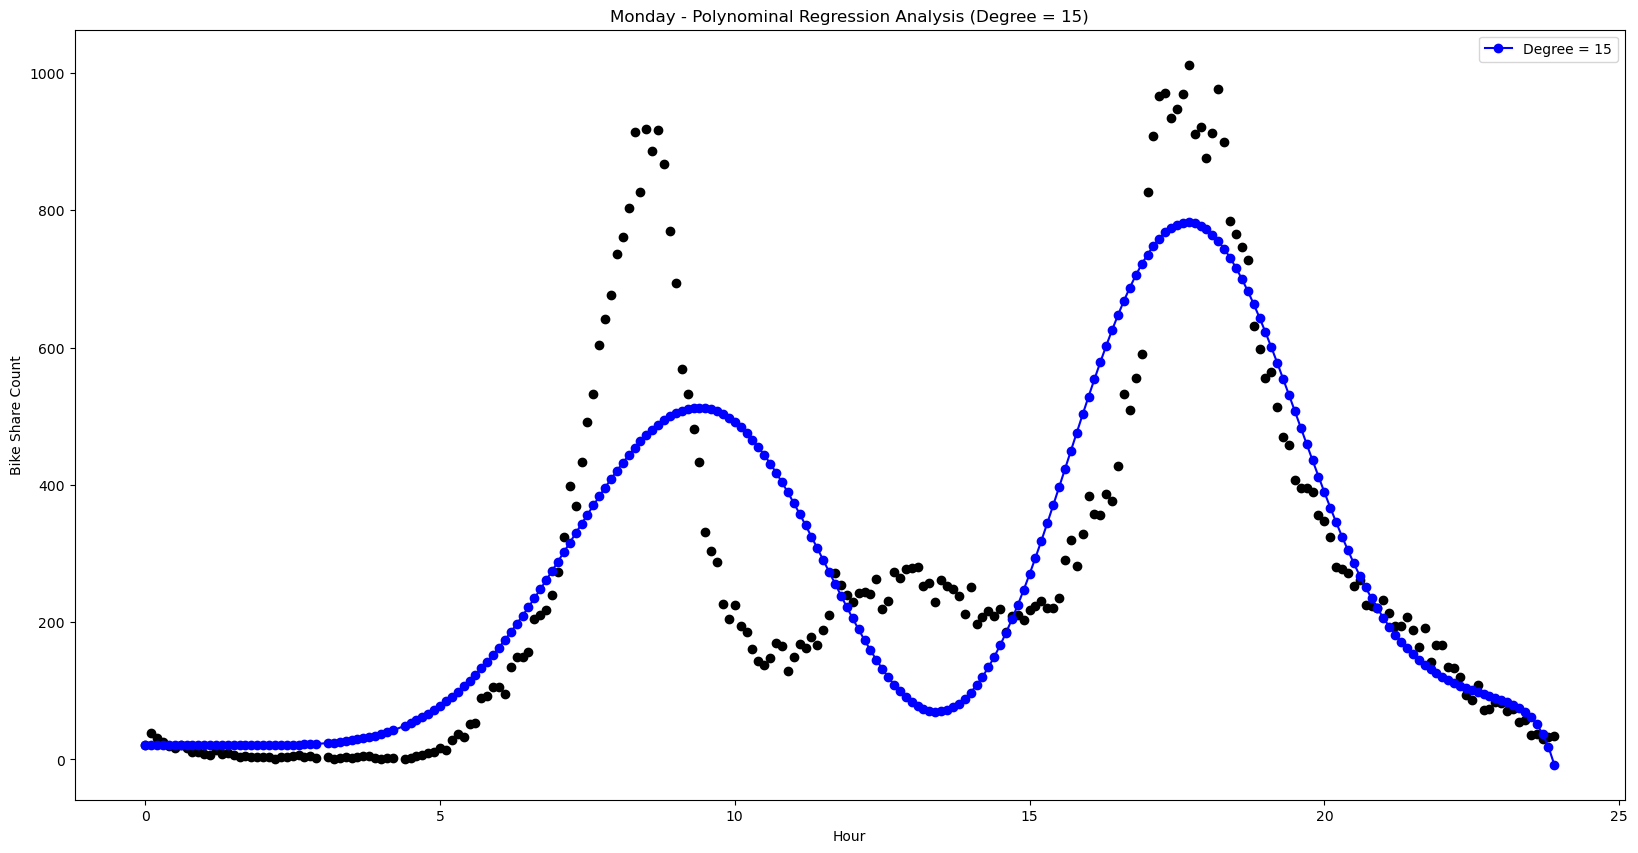

38378.36313921594


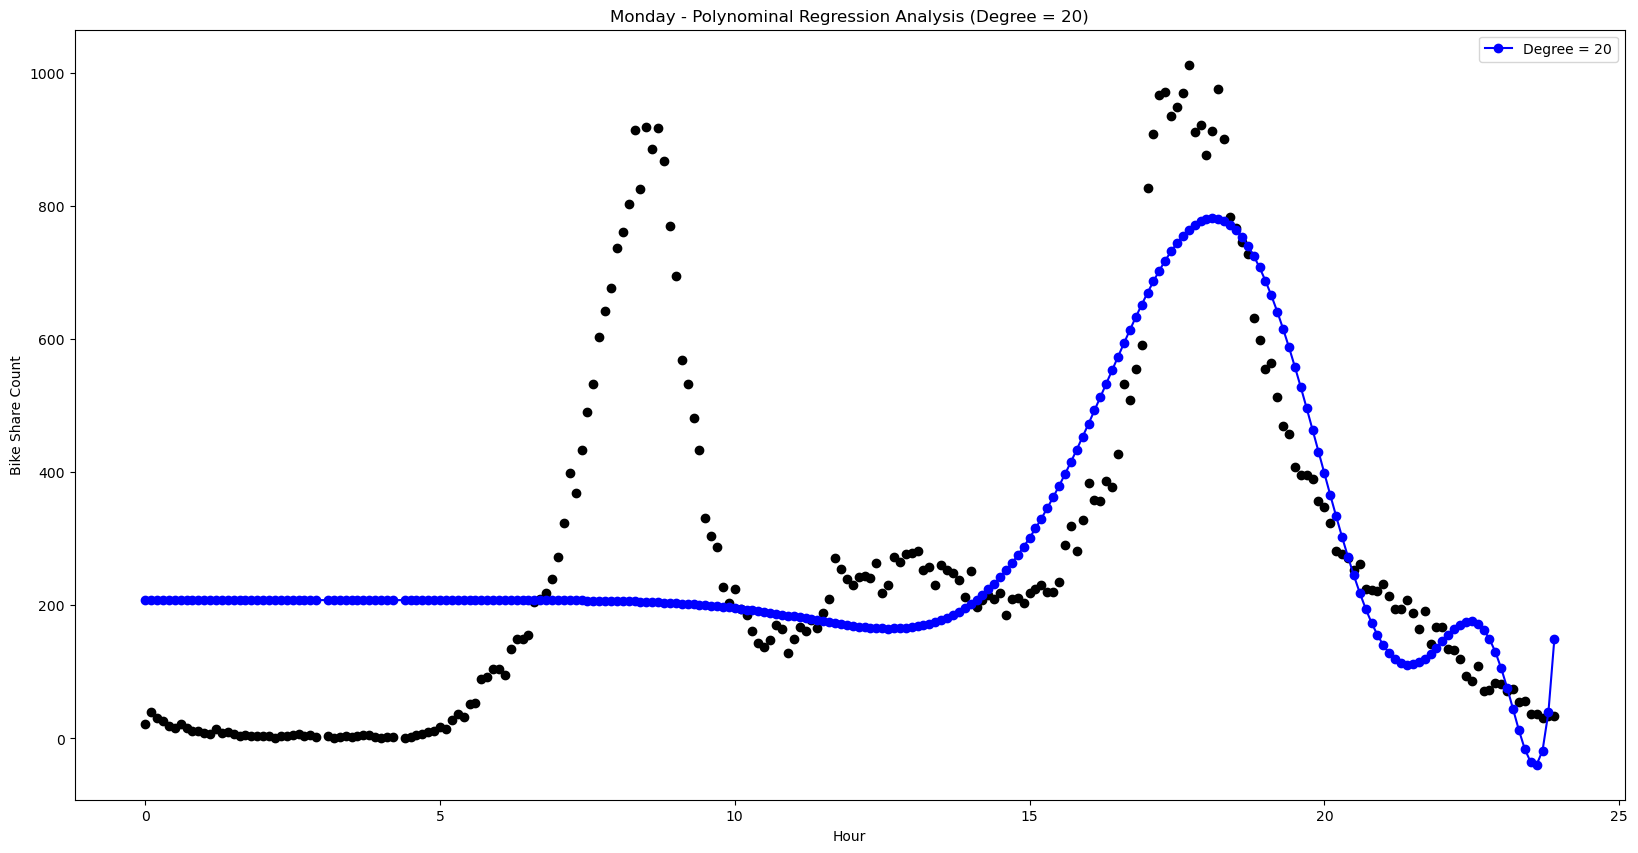

For this particular question, I believe that Model #2 is the optimal model when taking into consideration how well it fits the data. Relative to the other two models that were created, Model #2 has the lowest mean squared error value @ 18493.94. This value is significantly lower when compared to the other values (Model 1 – 41987.44 and Model 3 – 38378.36).


In [5]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Clean Data (drop NAs) from Monday dataset.
monday_cleaned = monday.dropna(subset=['hour', 'monday'])
X_mc = monday_cleaned[['hour']].values
Y_mc = monday_cleaned[['monday']].values

#Set polynominal degree to 5 & create a linear regression model. Fit polynominal features + transform data.
n = 5
linear_mc5 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X5_monday = poly.fit_transform(X_mc)

#Fit linear regression line to the transformed polynominal data + calculate the mean squared error (MSE) to calculate performance of the model.
linear_mc5.fit(X5_monday, Y_mc)
MSE_mx5 = mean_squared_error(Y_mc, linear_mc5.predict(X5_monday))
print(MSE_mx5)

#Original data scatter plot.
plt.scatter(X_mc, Y_mc, color='black')

#Create prediction values.
y_p1 = linear_mc5.predict(X5_monday)

#Scatter plot that visualizes the original data against y_p1.
plt.plot(X_mc, y_p1, color='blue', linestyle='-', marker='o', label="Degree = 5")
plt.title("Monday - Polynominal Regression Analysis (Degree = 5)")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------
#Clean Data (drop NAs) from Monday dataset.
monday_cleaned = monday.dropna(subset=['hour', 'monday'])
X_mc = monday_cleaned[['hour']].values
Y_mc = monday_cleaned[['monday']].values

#Set polynominal degree to 15 & create a linear regression model. Fit polynominal features + transform data.
n = 15
linear_mc15 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X15_monday = poly.fit_transform(X_mc)

#Fit linear regression line to the transformed polynominal data + calculate the mean squared error (MSE) to calculate performance of the model.
linear_mc15.fit(X15_monday, Y_mc)
MSE_mx15 = mean_squared_error(Y_mc, linear_mc15.predict(X15_monday))
print(MSE_mx15)

#Original data scatter plot.
plt.scatter(X_mc, Y_mc, color='black')

#Create prediction values.
y_p2 = linear_mc15.predict(X15_monday)

#Scatter plot that visualizes the original data against y_p2.
plt.plot(X_mc, y_p2, color='blue', linestyle='-', marker='o', label="Degree = 15")
plt.title("Monday - Polynominal Regression Analysis (Degree = 15)")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

#--------------------------------------------------------------------------------------------------
#Clean Data (drop NAs) from Monday dataset.
monday_cleaned = monday.dropna(subset=['hour', 'monday'])
X_mc = monday_cleaned[['hour']].values
Y_mc = monday_cleaned[['monday']].values

#Set polynominal degree to 20 & create a linear regression model. Fit polynominal features + transform data.
n = 20
linear_mc20 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X20_monday = poly.fit_transform(X_mc)

#Fit linear regression line to the transformed polynominal data + calculate the mean squared error (MSE) to calculate performance of the model.
linear_mc20.fit(X20_monday, Y_mc)
MSE_mx20 = mean_squared_error(Y_mc, linear_mc20.predict(X20_monday))
print(MSE_mx20)

#Original data scatter plot.
plt.scatter(X_mc, Y_mc, color='black')

#Create prediction values.
y_p3 = linear_mc20.predict(X20_monday)

#Scatter plot that visualizes the original data against y_p3.
plt.plot(X_mc, y_p3, color='blue', linestyle='-', marker='o', label="Degree = 20")
plt.title("Monday - Polynominal Regression Analysis (Degree = 20)")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

print("""For this particular question, I believe that Model #2 is the optimal model when taking into consideration how well it fits the data. Relative to the other two models that were created, Model #2 has the lowest mean squared error value @ 18493.94. This value is significantly lower when compared to the other values (Model 1 – 41987.44 and Model 3 – 38378.36).""")

## 2b. Repeat `2a` for `saturday`

995.2167048171051


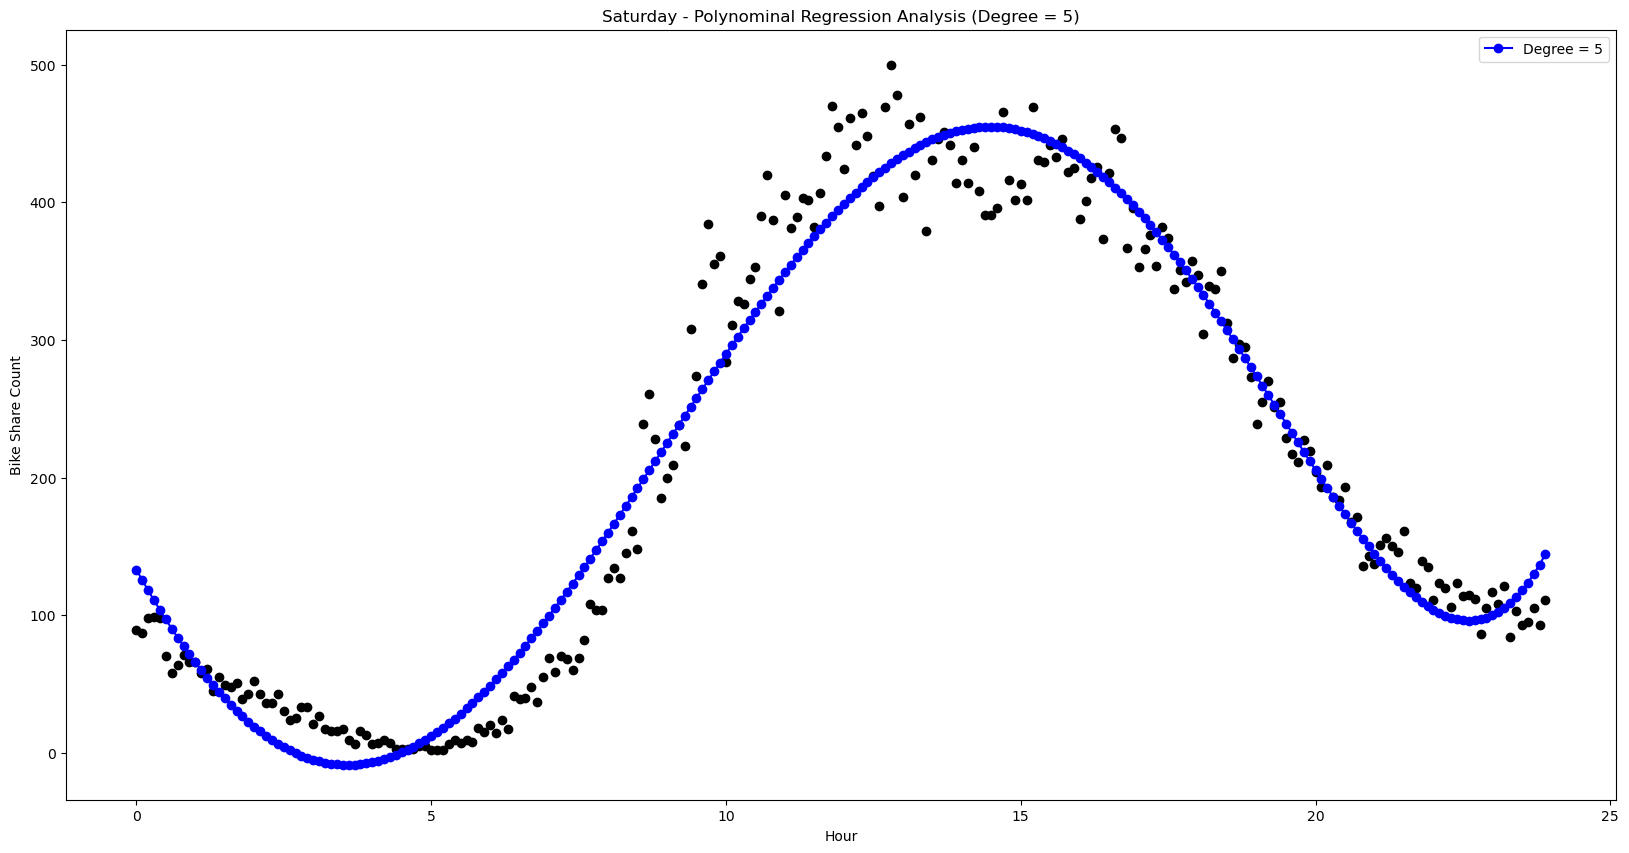

809.0492469315637


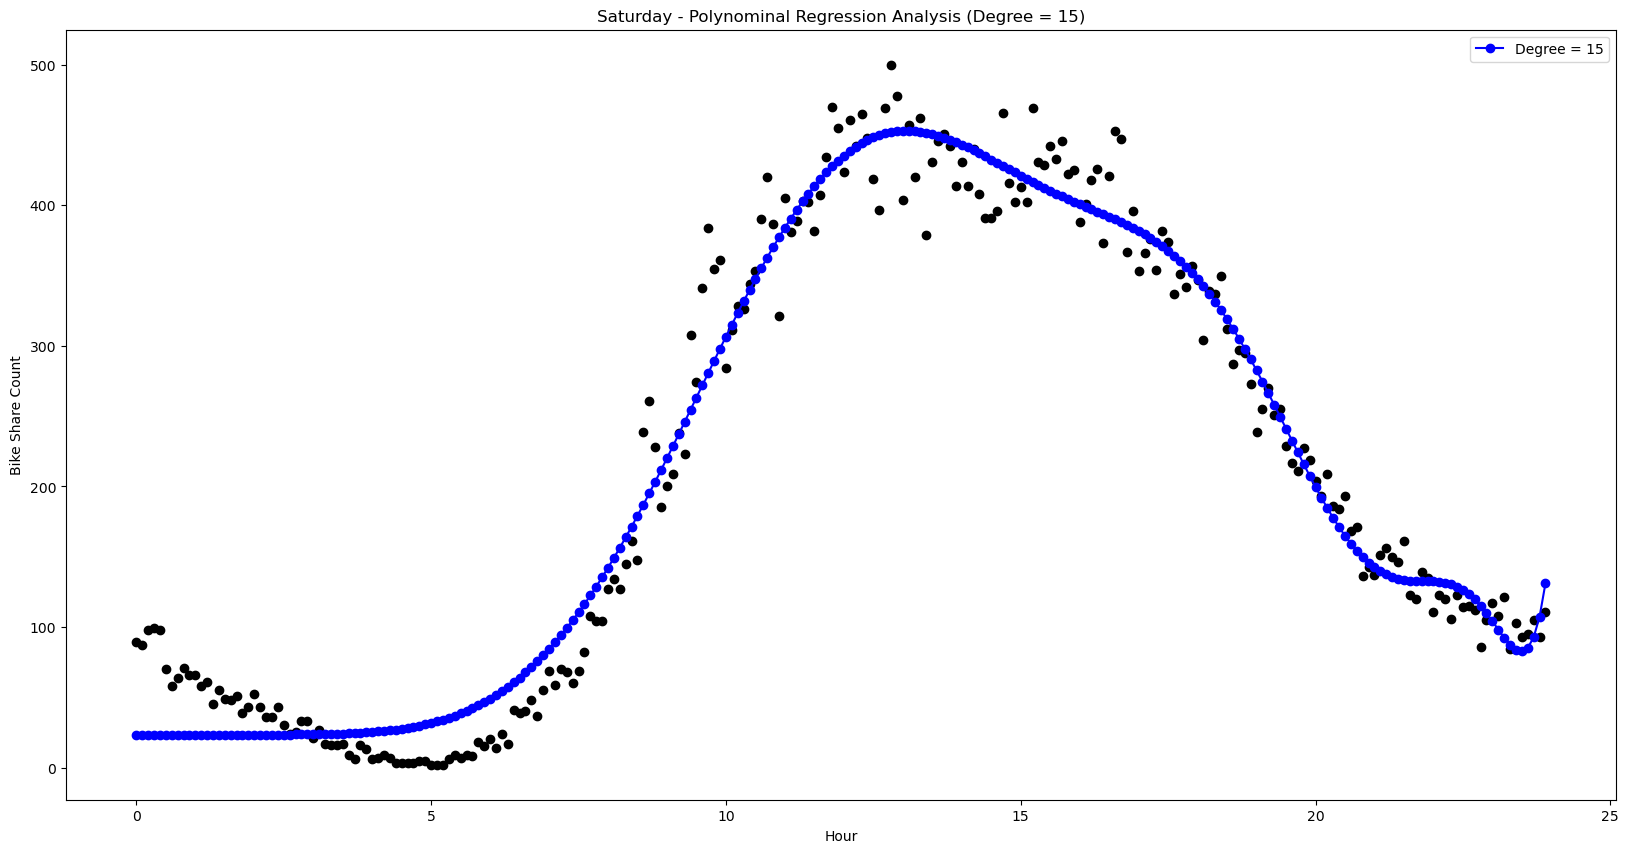

6297.797120935239


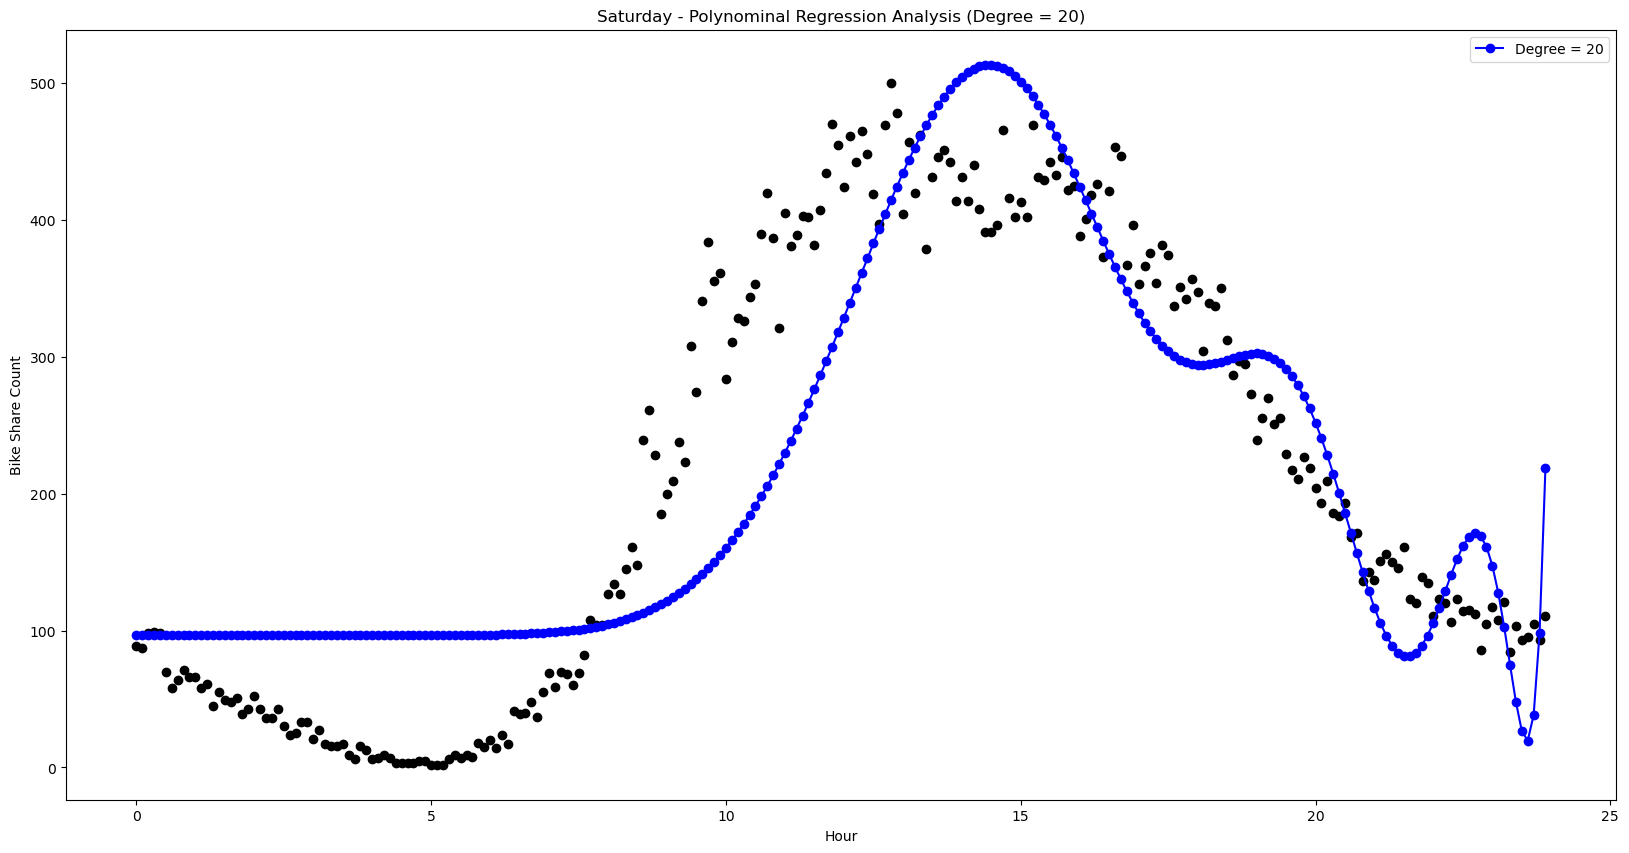

Once again, as with the previous question above, I believe that the most appropriate model would be Model #2. I believe this to be the case because the mean squared error (MSE) for Model #2 is the lowest out of the three created for this question. It should be noted that the discrepancy between MSE values are minimized, at least when comparing Model #2 to Model #1 (809.04 vs 995.21). That being said, the MSE value for Model #3 is fairly high @ 6297.79.


In [6]:
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Clean Data (drop NAs) from Saturday dataset.
saturday_cleaned = saturday.dropna(subset=['hour', 'saturday'])
X_sc = saturday_cleaned[['hour']].values
Y_sc = saturday_cleaned[['saturday']].values

#Set polynomial degree to 5 & create a linear regression model. Fit polynomial features + transform data.
n = 5
linear_sc5 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X5_saturday = poly.fit_transform(X_sc)

#Fit linear regression line to the transformed polynominal data + calculate the mean squared error (MSE) to calculate performance of the model.
linear_sc5.fit(X5_saturday, Y_sc)
MSE_sx5 = metrics.mean_squared_error(Y_sc, linear_sc5.predict(X5_saturday))
print(MSE_sx5)

#Original data scatter plot.
plt.scatter(X_sc, Y_sc, color='black')

#Create prediction values.
y_p4 = linear_sc5.predict(X5_saturday)

#Scatter plot that visualizes the original data against y_p1.
plt.plot(X_sc, y_p4, color='blue', linestyle='-', marker='o', label="Degree = 5")
plt.title("Saturday - Polynominal Regression Analysis (Degree = 5)")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

#------------------------------------------------------------------------------------------------
#Clean Data (drop NAs) from Saturday dataset.
saturday_cleaned = saturday.dropna(subset=['hour', 'saturday'])
X_sc = saturday_cleaned[['hour']].values
Y_sc = saturday_cleaned[['saturday']].values

#Set polynomial degree to 15 & create a linear regression model. Fit polynomial features + transform data.
n = 15
linear_sc15 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X15_saturday = poly.fit_transform(X_sc)

#Fit linear regression line to the transformed polynominal data + calculate the mean squared error (MSE) to calculate performance of the model.
linear_sc15.fit(X15_saturday, Y_sc)
MSE_sx15 = metrics.mean_squared_error(Y_sc, linear_sc15.predict(X15_saturday))
print(MSE_sx15)

#Original data scatter plot.
plt.scatter(X_sc, Y_sc, color='black')

#Create prediction values.
y_p5 = linear_sc15.predict(X15_saturday)

#Scatter plot that visualizes the original data against y_p2.
plt.plot(X_sc, y_p5, color='blue', linestyle='-', marker='o', label="Degree = 15")
plt.title("Saturday - Polynominal Regression Analysis (Degree = 15)")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

#-------------------------------------------------------------------------------------------------
#Clean Data (drop NAs) from Saturday dataset.
saturday_cleaned = saturday.dropna(subset=['hour', 'saturday'])
X_sc = saturday_cleaned[['hour']].values
Y_sc = saturday_cleaned[['saturday']].values

#Set polynomial degree to 20 & create a linear regression model. Fit polynomial features + transform data.
n = 20
linear_sc20 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X20_saturday = poly.fit_transform(X_sc)

#Fit linear regression line to the transformed polynominal data + calculate the mean squared error (MSE) to calculate performance of the model.
linear_sc20.fit(X20_saturday, Y_sc)
MSE_sx20 = metrics.mean_squared_error(Y_sc, linear_sc20.predict(X20_saturday))
print(MSE_sx20)

#Original data scatter plot.
plt.scatter(X_sc, Y_sc, color='black')

#Create prediction values.
y_p6 = linear_sc20.predict(X20_saturday)

#Scatter plot that visualizes the original data against y_p3.
plt.plot(X_sc, y_p6, color='blue', linestyle='-', marker='o', label="Degree = 20")
plt.title(("Saturday - Polynominal Regression Analysis (Degree = 20)"))
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

print("""Once again, as with the previous question above, I believe that the most appropriate model would be Model #2. I believe this to be the case because the mean squared error (MSE) for Model #2 is the lowest out of the three created for this question. It should be noted that the discrepancy between MSE values are minimized, at least when comparing Model #2 to Model #1 (809.04 vs 995.21). That being said, the MSE value for Model #3 is fairly high @ 6297.79.""")

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


Monday's Errors:
MSE: 19403.94134349191
MAE: 98.16098522770629
MAPE: 1.9445165626103553%
Tuesday's Errors:
MSE: 23866.31105462709
MAE: 105.98070558014379
MAPE: 1.9135559739769625%


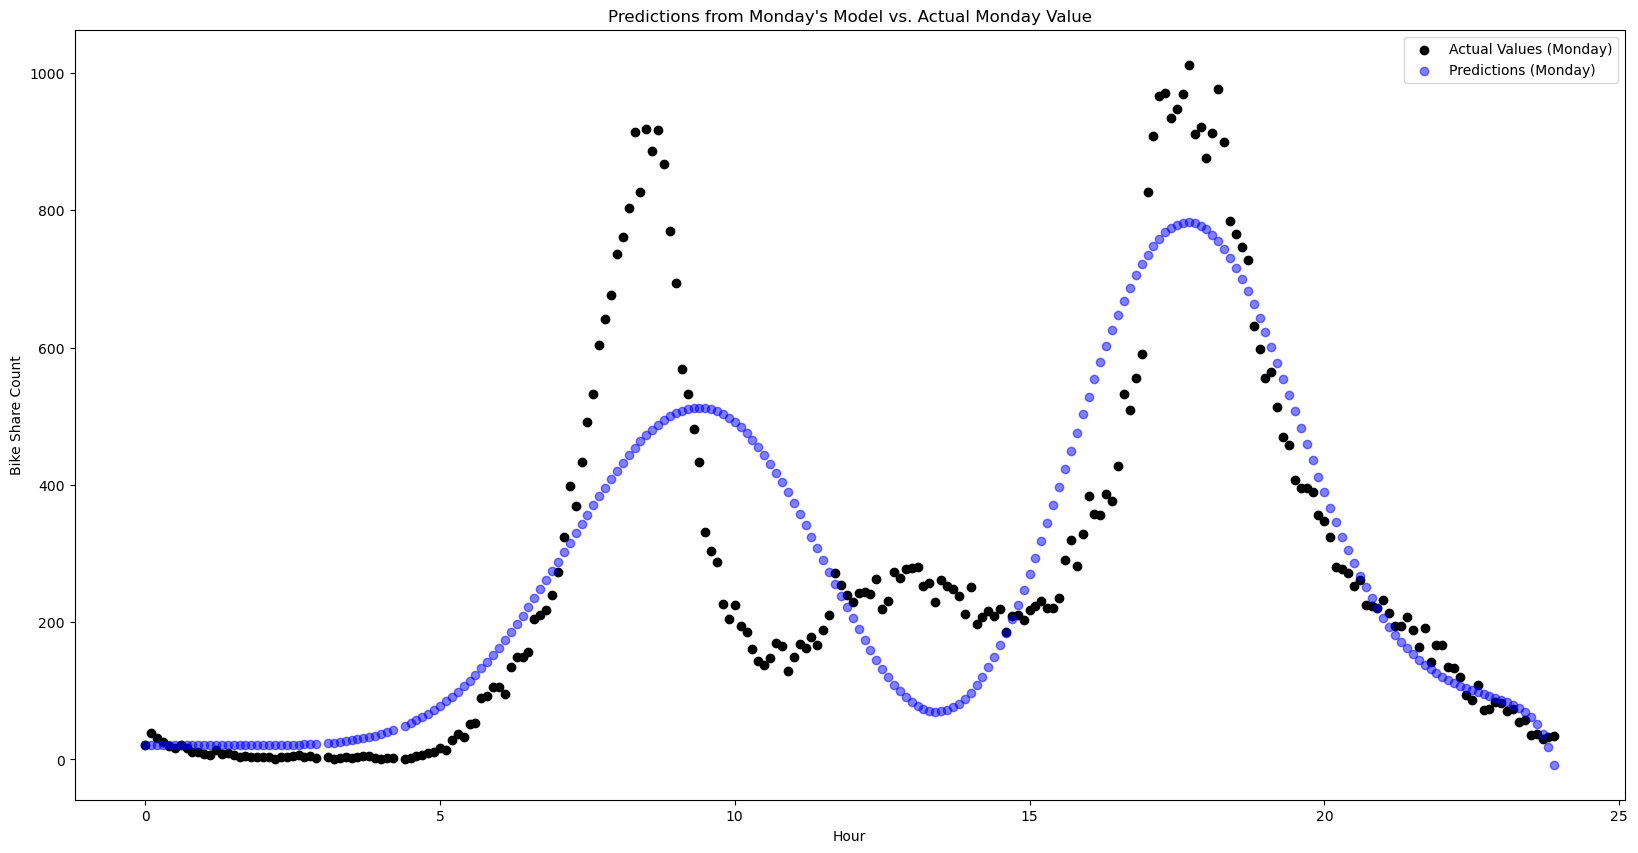

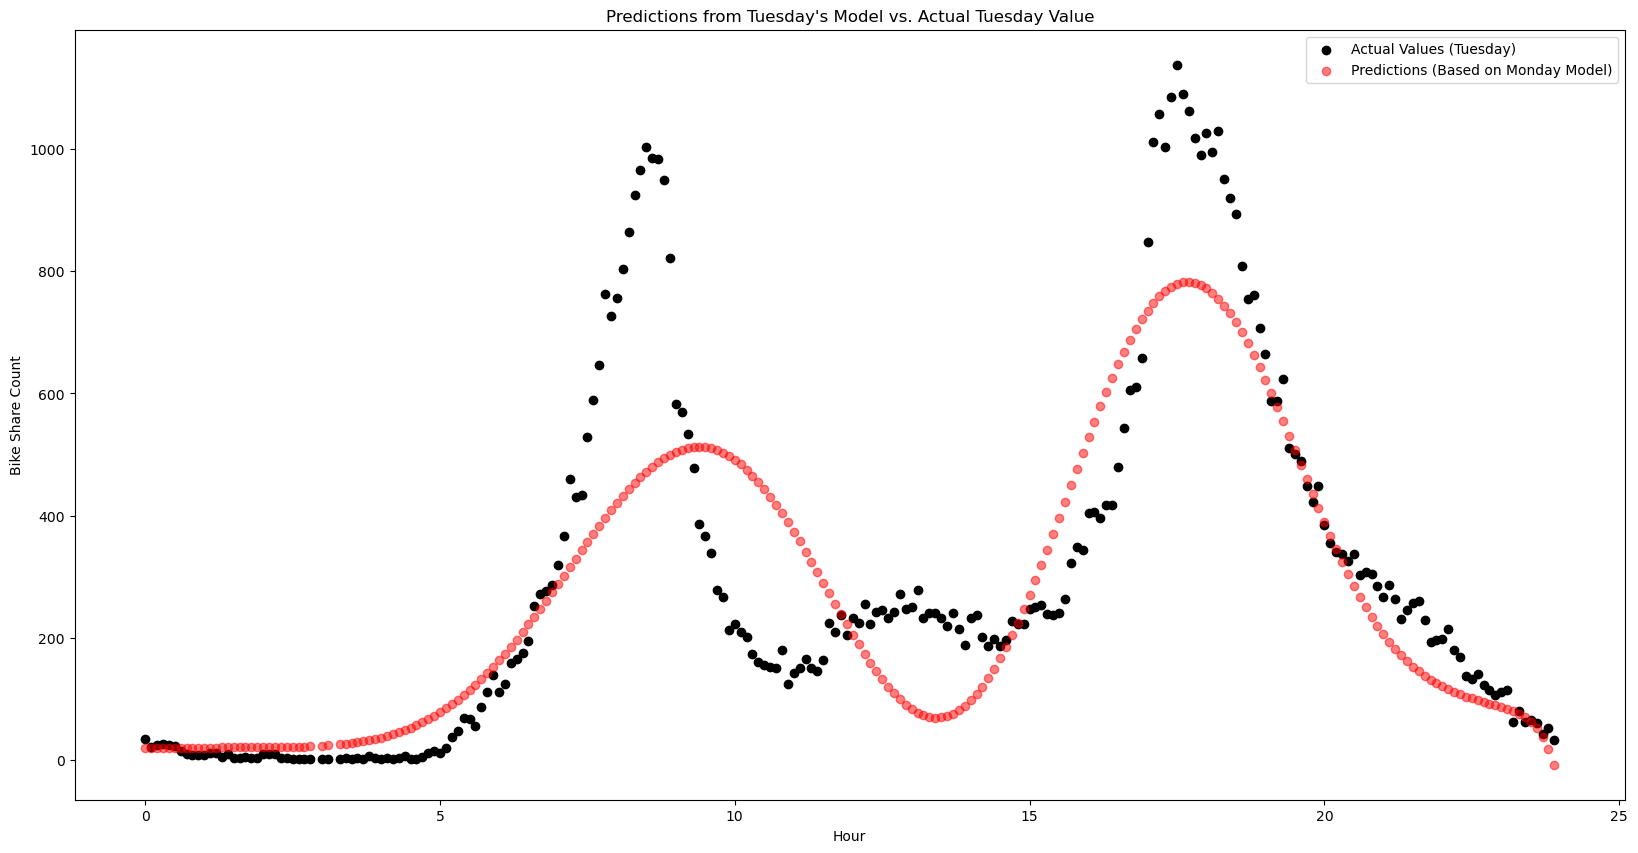

When investigating which model is the best fit for this question, one has to first analyze the values associated with MSE, MAE, and MAPE. After obtaining these values, we can confidently say that Monday’s model is the most appropriate/best fit. I say this for two reasons; first, the MSE value for Monday’s model (19403.94) is lower than Tuesday’s model (23866.31), and secondly the MAE value for Monday’s model (98.16) is lower than Tuesday’s (105.98). However, it should be noted that MAPE value for the Tuesday model was lower than Monday’s model. 


In [7]:
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Clean Data (drop NAs) from Monday and Tuesday datasets.
monday_cleaned = monday.dropna(subset=['hour', 'monday'])
tuesday_cleaned = tuesday.dropna(subset=['hour', 'tuesday'])
X_mc = monday_cleaned[['hour']].values
Y_mc = monday_cleaned[['monday']].values
X_tc = tuesday_cleaned[['hour']].values
Y_tc = tuesday_cleaned[['tuesday']].values

#Set polynomial degree to 15 & create a linear regression model. Fit polynomial features + transform data.
n = 15
linear_mc15 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X15_monday = poly.fit_transform(X_mc)

#Fit model for Monday + perform prediction.
linear_mc15.fit(X15_monday, Y_mc)
y_p7 = linear_mc15.predict(X15_monday)

#Transform Tuesday data + perform prediction.
X15_tuesday = poly.transform(X_tc)
y_p8 = linear_mc15.predict(X15_tuesday)

#Errors for Monday pred.
mse_monday = metrics.mean_squared_error(Y_mc, y_p7)
mae_monday = metrics.mean_absolute_error(Y_mc, y_p7)
mape_monday = metrics.mean_absolute_percentage_error(Y_mc, y_p7)

#Errors for Tuesday pred.
mse_tuesday = metrics.mean_squared_error(Y_tc, y_p8)
mae_tuesday = metrics.mean_absolute_error(Y_tc, y_p8)
mape_tuesday = metrics.mean_absolute_percentage_error(Y_tc, y_p8)

#Display Monday's errors.
print("Monday's Errors:")
print(f"MSE: {mse_monday}")
print(f"MAE: {mae_monday}")
print(f"MAPE: {mape_monday}%")

#Display Tuesday's errors.
print("Tuesday's Errors:")
print(f"MSE: {mse_tuesday}")
print(f"MAE: {mae_tuesday}")
print(f"MAPE: {mape_tuesday}%")

#Scatter plot for Monday.
plt.scatter(X_mc, Y_mc, color='black', label='Actual Values (Monday)')
plt.scatter(X_mc, y_p7, color='blue', alpha=0.5, label='Predictions (Monday)', marker='o')
plt.title("Predictions from Monday's Model vs. Actual Monday Value")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

#Scatter plot for Tuesday.
plt.scatter(X_tc, Y_tc, color='black', label='Actual Values (Tuesday)')
plt.scatter(X_tc, y_p8, color='red', alpha=0.5, label='Predictions (Based on Monday Model)', marker='o')
plt.title("Predictions from Tuesday's Model vs. Actual Tuesday Value")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

print("""When investigating which model is the best fit for this question, one has to first analyze the values associated with MSE, MAE, and MAPE. After obtaining these values, we can confidently say that Monday’s model is the most appropriate/best fit. I say this for two reasons; first, the MSE value for Monday’s model (19403.94) is lower than Tuesday’s model (23866.31), and secondly the MAE value for Monday’s model (98.16) is lower than Tuesday’s (105.98). However, it should be noted that MAPE value for the Tuesday model was lower than Monday’s model. """)

Saturday's Errors:
MSE: 809.0492469315637
MAE: 22.623616516858565
MAPE: 0.7329120056875474%
Sunday's Errors:
MSE: 1638.8800373003367
MAE: 34.649504320766695
MAPE: 0.9312408948850185%


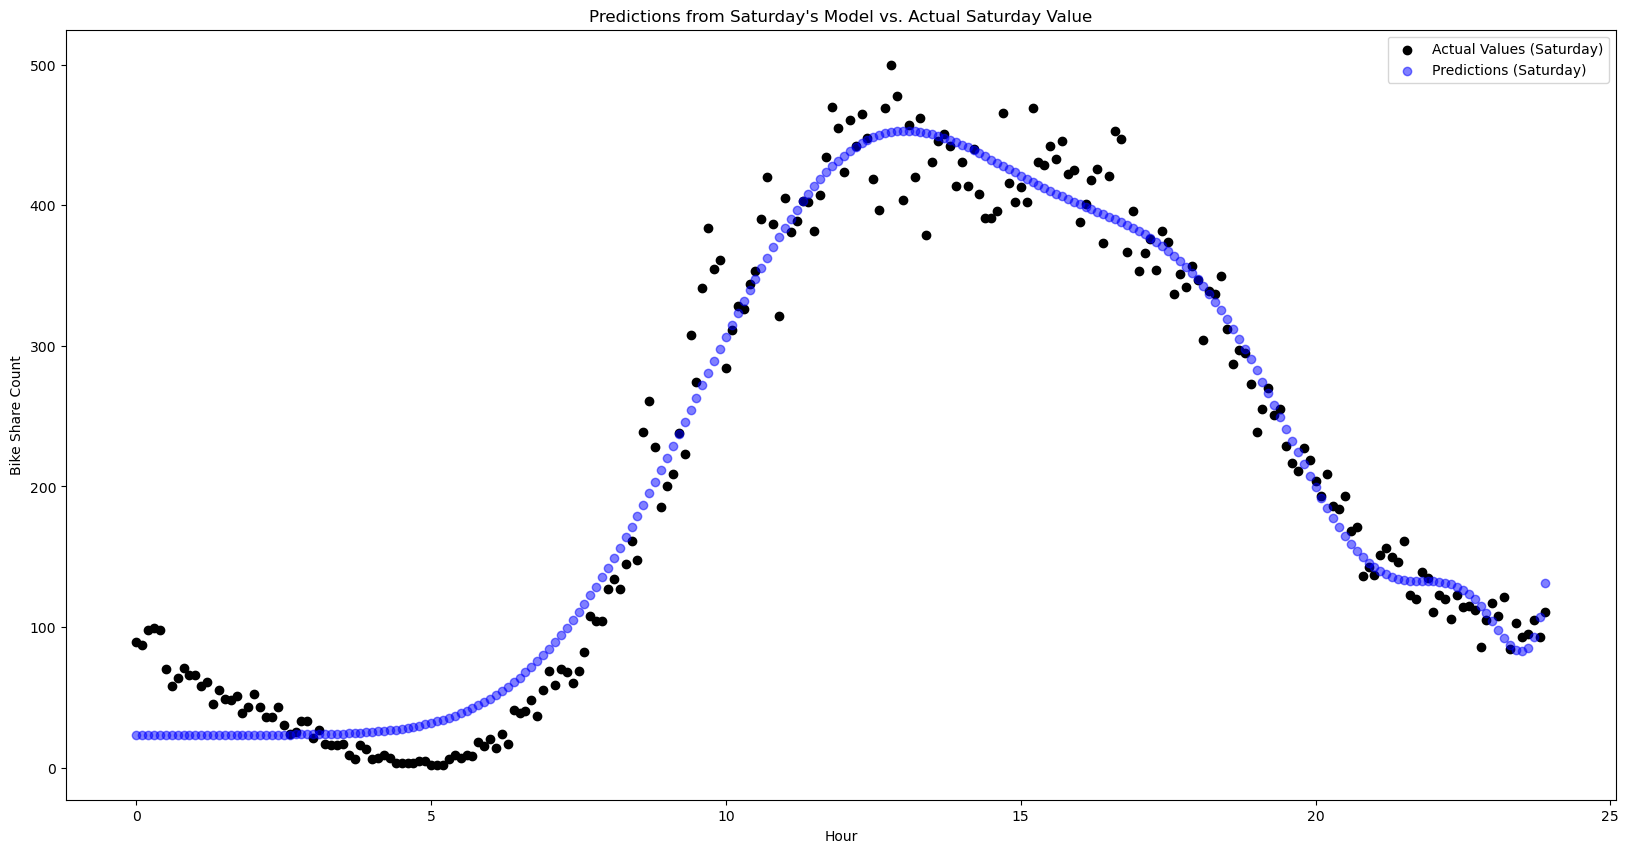

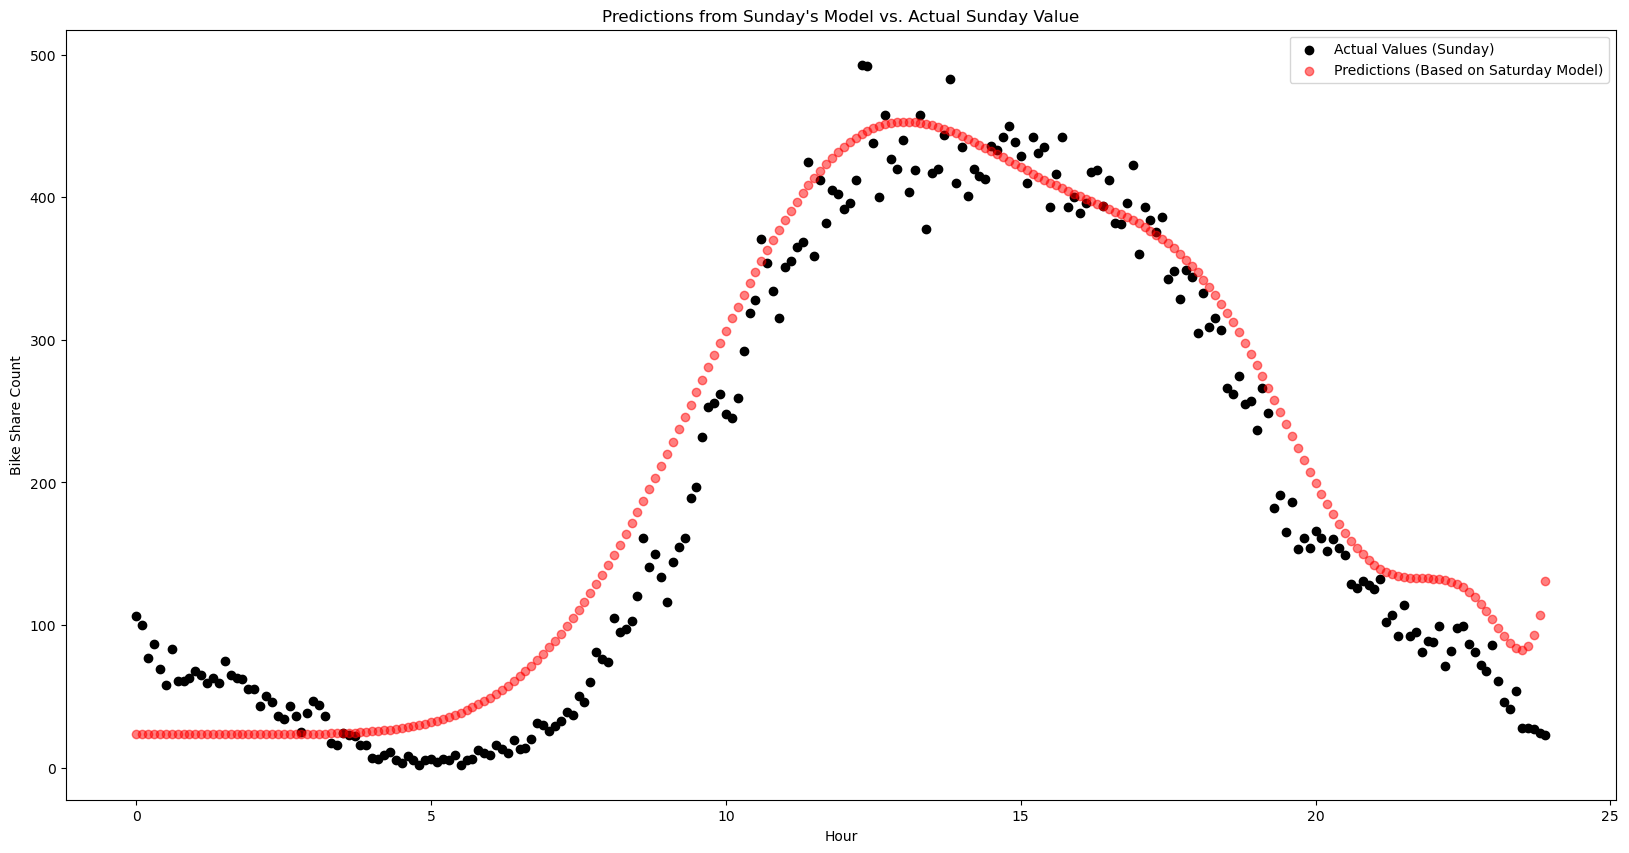

Once again, it is of upmost importance that we analyze the MSE, MAE, and MAPE when considering which model is the best fit/most appropriate. After calculating these values and analyzing them, we arrive at the conclusion that Saturday’s model is the best fit/most appropriate. Why do I think this? Well, for starters, the MSE value for Saturday’s model is 809.04 while Sunday’s model is 1638.88. Additionally, the MAE for Saturday’s model is 22.62 while Sunday’s model is 34.65. Finally, the MAPE value is a tiny bit lower for Saturday’s model (0.73% vs. Sunday’s 0.93%).


In [8]:
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Clean Data (drop NAs) from Saturday and Sunday datasets.
sunday_cleaned = sunday.dropna(subset=['hour', 'sunday'])
X_sc = saturday_cleaned[['hour']].values
Y_sc = saturday_cleaned[['saturday']].values
X_su = sunday_cleaned[['hour']].values
Y_su = sunday_cleaned[['sunday']].values

#Set polynomial degree to 15 & create a linear regression model. Fit polynomial features + transform data.
n = 15
linear_sc15 = linear_model.LinearRegression()
poly = PolynomialFeatures(degree=n)
X15_saturday = poly.fit_transform(X_sc)

#Fit model for Saturday + perform prediction.
linear_sc15.fit(X15_saturday, Y_sc)
y_p9 = linear_sc15.predict(X15_saturday)

#Transform Sunday data + perform prediction.
X15_sunday = poly.transform(X_su)
y_p10 = linear_sc15.predict(X15_sunday)

#Errors for Saturday pred.
mse_saturday = metrics.mean_squared_error(Y_sc, y_p9)
mae_saturday = metrics.mean_absolute_error(Y_sc, y_p9)
mape_saturday = metrics.mean_absolute_percentage_error(Y_sc, y_p9)

#Errors for Sunday pred.
mse_sunday = metrics.mean_squared_error(Y_su, y_p10)
mae_sunday = metrics.mean_absolute_error(Y_su, y_p10)
mape_sunday = metrics.mean_absolute_percentage_error(Y_su, y_p10)

#Display Saturday's errors.
print("Saturday's Errors:")
print(f"MSE: {mse_saturday}")
print(f"MAE: {mae_saturday}")
print(f"MAPE: {mape_saturday}%")

#Display Sunday's errors.
print("Sunday's Errors:")
print(f"MSE: {mse_sunday}")
print(f"MAE: {mae_sunday}")
print(f"MAPE: {mape_sunday}%")

#Scatter plot for Saturday.
plt.scatter(X_sc, Y_sc, color='black', label='Actual Values (Saturday)')
plt.scatter(X_sc, y_p9, color='blue', alpha=0.5, label='Predictions (Saturday)', marker='o')
plt.title("Predictions from Saturday's Model vs. Actual Saturday Value")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

#Scatter plot for Sunday.
plt.scatter(X_su, Y_su, color='black', label='Actual Values (Sunday)')
plt.scatter(X_su, y_p10, color='red', alpha=0.5, label='Predictions (Based on Saturday Model)', marker='o')
plt.title("Predictions from Sunday's Model vs. Actual Sunday Value")
plt.xlabel("Hour")
plt.ylabel("Bike Share Count")
plt.legend()
plt.show()

print("""Once again, it is of upmost importance that we analyze the MSE, MAE, and MAPE when considering which model is the best fit/most appropriate. After calculating these values and analyzing them, we arrive at the conclusion that Saturday’s model is the best fit/most appropriate. Why do I think this? Well, for starters, the MSE value for Saturday’s model is 809.04 while Sunday’s model is 1638.88. Additionally, the MAE for Saturday’s model is 22.62 while Sunday’s model is 34.65. Finally, the MAPE value is a tiny bit lower for Saturday’s model (0.73% vs. Sunday’s 0.93%).""")

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

Saturday's Errors:
MSE: 1059.6698116652585
MAE: 24.54029569887213
MAPE: 0.3741815631519794%


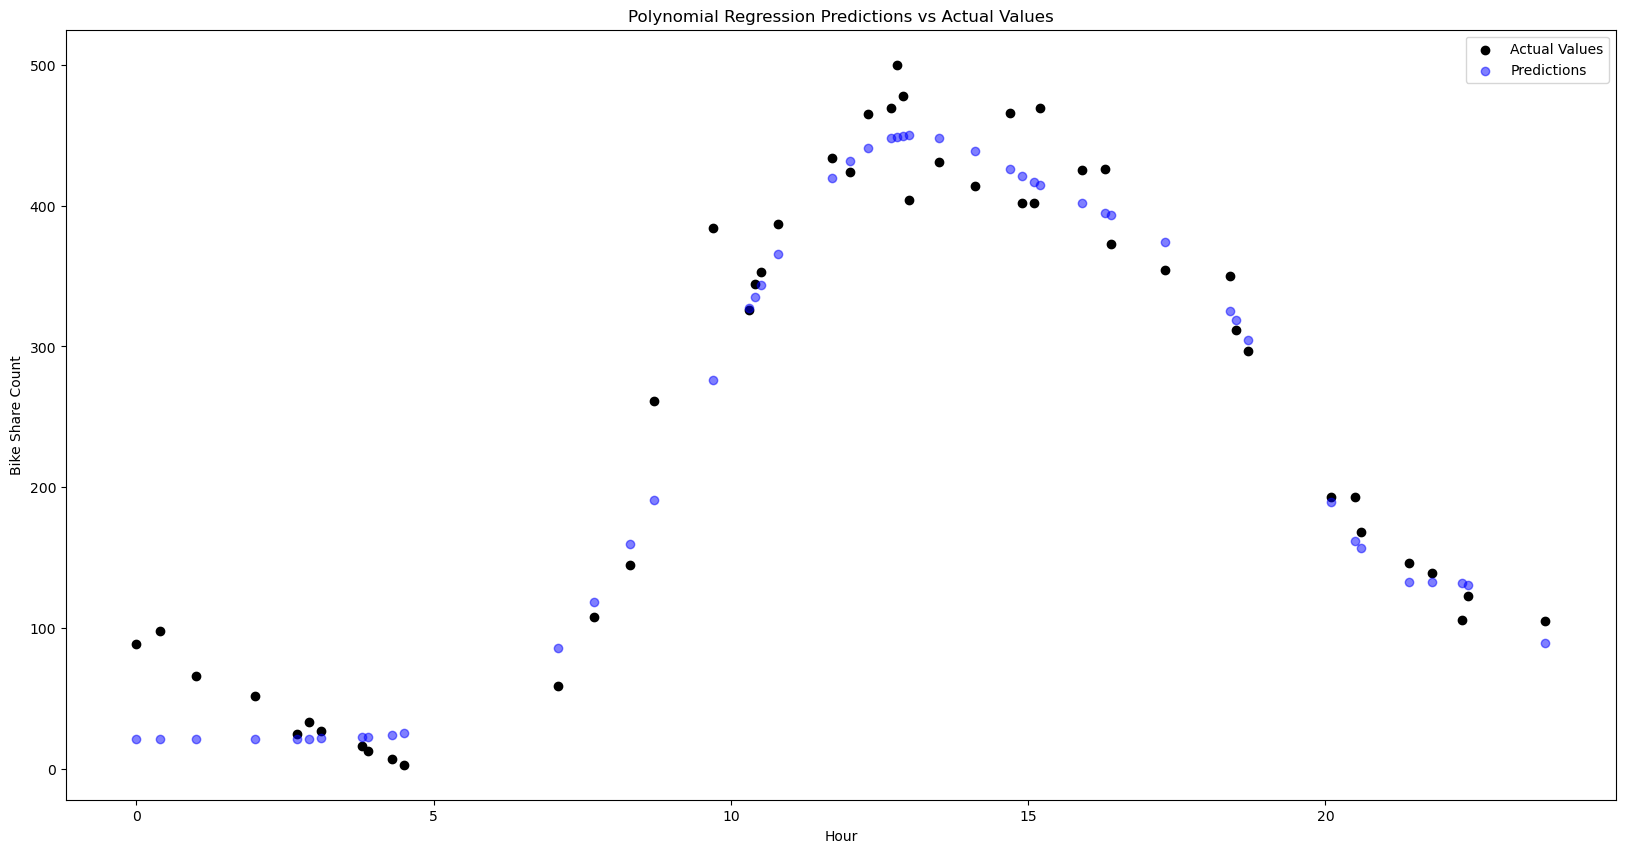

Monday's Errors:
MSE: 16399.546792803267
MAE: 87.17348017484365
MAPE: 2.4655957253991336%


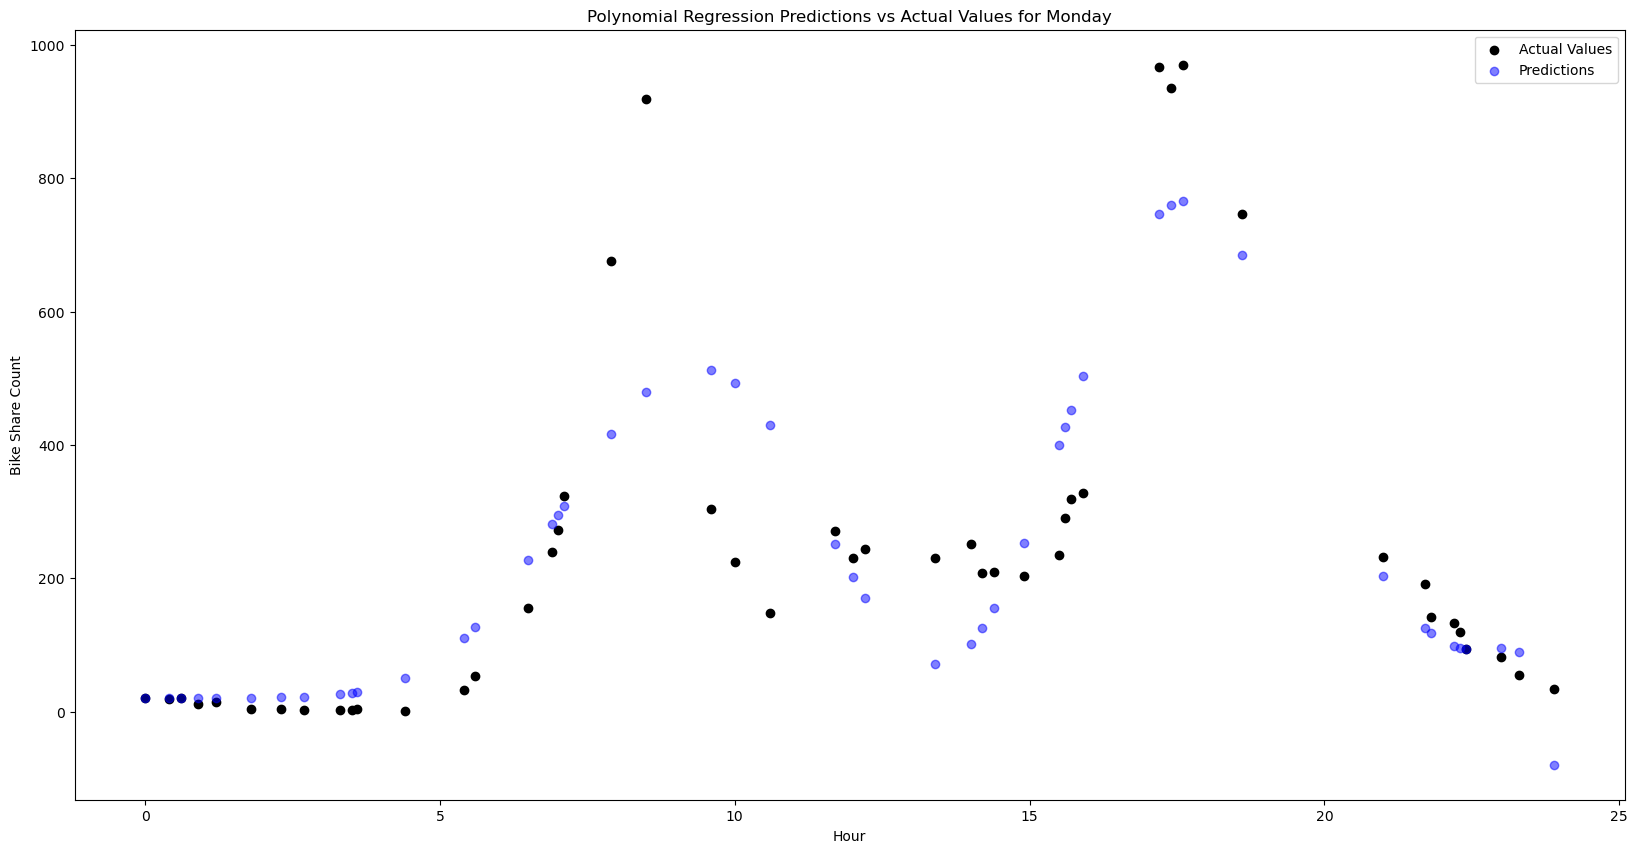

This particular question asked us to create training/test sets and apply them to two models (Saturday being the first model, while Monday is the second model). Once we have established the training/test sets + polytransformation/linear regression model + calculated the MSE, MAE, MAPE for their respective models, we are able to start analyzing which model is the better fit. To do this, we will analyze MSE, MAE, and MAPE. By analyzing these values, we are able to conclude that Saturday’s model is superior. This is because Saturday’s model has lower values across the board (MSE, MAE, and MAPE) when compared to Monday’s model.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np

#Saturday.
X_sc = saturday_cleaned[['hour']].values
Y_sc = saturday_cleaned[['saturday']].values

#Set polynomial degree + create training and test sets + perform polynominal transfomration.
n = 15
xtrain, xtest, ytrain, ytest = train_test_split(X_sc, Y_sc, test_size=0.2)
poly = PolynomialFeatures(degree=n)

#Polynominal transformation of the xtest and xtrain sets.
X_ttrain = poly.fit_transform(xtrain)
X_ttest = poly.transform(xtest)

#Create linear regression model + fit the model.
linear_tsp = linear_model.LinearRegression()
linear_tsp.fit(X_ttrain, ytrain)

#Compute predictions for the test set.
y_p11 = linear_tsp.predict(X_ttest)

#Errors for Saturday.
saturday_mse = metrics.mean_squared_error(ytest, y_p11)
saturday_mae = metrics.mean_absolute_error(ytest, y_p11)
saturday_mape = metrics.mean_absolute_percentage_error(ytest, y_p11)

#Display errors for Saturday.
print("Saturday's Errors:")
print(f"MSE: {saturday_mse}")
print(f"MAE: {saturday_mae}")
print(f"MAPE: {saturday_mape}%")

#Scatter plot for the test values.
plt.scatter(xtest, ytest, color='black', label='Actual Values')
plt.scatter(xtest, y_p11, color='blue', label='Predictions', alpha=0.5)
plt.title('Polynomial Regression Predictions vs Actual Values')
plt.xlabel('Hour')
plt.ylabel('Bike Share Count')
plt.legend()
plt.show()
#----------------------------------------------------------------------------------
#Monday
X_mc = monday_cleaned[['hour']].values
Y_mc = monday_cleaned[['monday']].values

#Set polynomial degree + create training and test sets + perform polynomial transformation 
n = 15
xtrain, xtest, ytrain, ytest = train_test_split(X_mc, Y_mc, test_size=0.2)
poly = PolynomialFeatures(degree=n)

#Polynominal transformation of the xtest and xtrain sets.
X_tttrain = poly.fit_transform(xtrain)
X_tttest = poly.transform(xtest)

#Create linear regression model + fit the model.
linear_mtsp = linear_model.LinearRegression()
linear_mtsp.fit(X_tttrain, ytrain)

#Compute predictions for the test set.
y_p12 = linear_mtsp.predict(X_tttest)

#Errors for Monday.
mse_monday = metrics.mean_squared_error(ytest, y_p12)
mae_monday = metrics.mean_absolute_error(ytest, y_p12)
mape_monday = metrics.mean_absolute_percentage_error(ytest, y_p12)

#Display errors for Monday.
print("Monday's Errors:")
print(f"MSE: {mse_monday}")
print(f"MAE: {mae_monday}")
print(f"MAPE: {mape_monday}%")

#Scatter plot for test values.
plt.scatter(xtest, ytest, color='black', label='Actual Values')
plt.scatter(xtest, y_p12, color='blue', label='Predictions', alpha=0.5)
plt.title('Polynomial Regression Predictions vs Actual Values for Monday')
plt.xlabel('Hour')
plt.ylabel('Bike Share Count')
plt.legend()
plt.show()

print("""This particular question asked us to create training/test sets and apply them to two models (Saturday being the first model, while Monday is the second model). Once we have established the training/test sets + polytransformation/linear regression model + calculated the MSE, MAE, MAPE for their respective models, we are able to start analyzing which model is the better fit. To do this, we will analyze MSE, MAE, and MAPE. By analyzing these values, we are able to conclude that Saturday’s model is superior. This is because Saturday’s model has lower values across the board (MSE, MAE, and MAPE) when compared to Monday’s model.""")